In [1]:
import pandas as pd
file = r"C:\Users\Charan\Desktop\file (1).csv"
df = pd.read_csv(file)
df.head(20)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [2]:
# Splitting the 'Release_Date' column into 'Month' and 'Year'
df[['Released_Month', 'Released_Year']] = df['Release_Date'].str.split(', ', expand=True)

# Displaying the updated DataFrame
print(df.head())

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

In [3]:
df["Released_Year"].isnull().sum()

10

In [5]:
df['Released_Year'].fillna(0, inplace=True)
df['Released_Year'] = df['Released_Year'].astype(int)

In [6]:
print(repr(df.iloc[2666]["Description"][0:400]))
print(repr(df.iloc[4726]["Description"][0:400])) 

"This documentary tells the story of a teenage Pakistani girl shot for her advocacy of women's education, her survival, and her continued efforts."
'From his days as a petty thief to becoming head of a drug-trafficking empire, this riveting series charts the life of the infamous Pablo Escobar.'


In [7]:
import re
df["paragraphs"] = df["Description"].map(lambda text: re.split('\.\s*\n', text))
df["number_of_paragraphs"] = df["paragraphs"].map(len)

In [8]:
!pip install spacy

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

# Convert set of stopwords to a list
stopwords_list = list(stopwords)

# Create the TfidfVectorizer with the correct parameter
tfidf_text_vectorizer = TfidfVectorizer(stop_words=stopwords_list, min_df=5, max_df=0.7)

# Fit and transform the text data
tfidf_text_vectors = tfidf_text_vectorizer.fit_transform(df['Description'])

# Check the shape of the resulting vectors
tfidf_text_vectors.shape


C:\Users\Charan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(7789, 4227)

In [10]:
paragraph_df = pd.DataFrame([{ "Description": paragraph, "Released_Year": year }
               for paragraphs, year in zip(df["paragraphs"], df["Released_Year"])
                    for paragraph in paragraphs if paragraph])
paragraph_df.head(10)

,Description,Released_Year
0,In a future where the elite inhabit an island ...,2020
1,After a devastating earthquake hits Mexico Cit...,2016
2,"When an army recruit is found dead, his fellow...",2018
3,"In a postapocalyptic world, rag-doll robots hi...",2017
4,A brilliant group of students become card-coun...,2020
5,A genetics professor experiments with a treatm...,2017
6,"After an awful accident, a couple admitted to ...",2020
7,After one of his high school students attacks ...,2019
8,"When a doctor goes missing, his psychiatrist w...",2019
9,An architect and his wife move into a castle t...,2017


In [11]:
tfidf_para_vectorizer = TfidfVectorizer(stop_words=stopwords_list,min_df=5, max_df=0.7)
tfidf_para_vectors =tfidf_para_vectorizer.fit_transform(paragraph_df["Description"])
tfidf_para_vectors.shape

C:\Users\Charan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


(7789, 4227)

In [12]:
from sklearn.decomposition import NMF

nmf_text_model = NMF(n_components=10, random_state=42)
W_text_matrix = nmf_text_model.fit_transform(tfidf_text_vectors)
H_text_matrix = nmf_text_model.components_

In [13]:
def display_topics(model, features, no_top_words=5):
    for topic, words in enumerate(model.components_):
        total = words.sum()
        largest = words.argsort()[::-1] # invert sort order
        print("\nTopic %02d" % topic)
        for i in range(0, no_top_words):
            print(" %s (%2.2f)" % (features[largest[i]],abs(words[largest[i]]*100.0/total)))

display_topics(nmf_text_model,
tfidf_text_vectorizer.get_feature_names_out())


Topic 00
 world (6.08)
 war (1.70)
 ii (1.12)
 save (0.79)
 secret (0.50)

Topic 01
 young (3.66)
 man (2.96)
 woman (2.58)
 father (0.92)
 mother (0.61)

Topic 02
 school (6.34)
 high (5.36)
 student (1.68)
 students (1.31)
 teen (1.06)

Topic 03
 life (7.81)
 love (3.83)
 real (0.52)
 different (0.51)
 death (0.49)

Topic 04
 new (8.35)
 york (2.25)
 city (1.80)
 finds (1.23)
 home (0.73)

Topic 05
 friends (5.08)
 best (1.78)
 find (1.66)
 help (0.98)
 group (0.87)

Topic 06
 family (7.10)
 father (1.29)
 home (1.06)
 years (0.85)
 returns (0.77)

Topic 07
 stand (3.62)
 special (3.58)
 comedy (2.21)
 comedian (2.13)
 takes (1.65)

Topic 08
 documentary (3.06)
 series (2.96)
 follows (1.19)
 lives (1.00)
 story (0.83)

Topic 09
 old (6.98)
 year (5.85)
 boy (0.83)
 girl (0.82)
 home (0.77)


In [14]:
nmf_para_model = NMF(n_components=10, random_state=42)
W_para_matrix = nmf_para_model.fit_transform(tfidf_para_vectors)
H_para_matrix = nmf_para_model.components_
display_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())


Topic 00
 world (6.08)
 war (1.70)
 ii (1.12)
 save (0.79)
 secret (0.50)

Topic 01
 young (3.66)
 man (2.96)
 woman (2.58)
 father (0.92)
 mother (0.61)

Topic 02
 school (6.34)
 high (5.36)
 student (1.68)
 students (1.31)
 teen (1.06)

Topic 03
 life (7.81)
 love (3.83)
 real (0.52)
 different (0.51)
 death (0.49)

Topic 04
 new (8.35)
 york (2.25)
 city (1.80)
 finds (1.23)
 home (0.73)

Topic 05
 friends (5.08)
 best (1.78)
 find (1.66)
 help (0.98)
 group (0.87)

Topic 06
 family (7.10)
 father (1.29)
 home (1.06)
 years (0.85)
 returns (0.77)

Topic 07
 stand (3.62)
 special (3.58)
 comedy (2.21)
 comedian (2.13)
 takes (1.65)

Topic 08
 documentary (3.06)
 series (2.96)
 follows (1.19)
 lives (1.00)
 story (0.83)

Topic 09
 old (6.98)
 year (5.85)
 boy (0.83)
 girl (0.82)
 home (0.77)


In [15]:
W_text_matrix.sum(axis=0)/W_text_matrix.sum()*100.0

array([ 5.116993  , 16.6417806 ,  8.53398033, 11.79843374,  9.73841999,
       10.5666256 , 10.11069308,  8.10826559, 11.66903556,  7.71577252])

In [16]:
W_para_matrix.sum(axis=0)/W_para_matrix.sum()*100.0

array([ 5.116993  , 16.6417806 ,  8.53398033, 11.79843374,  9.73841999,
       10.5666256 , 10.11069308,  8.10826559, 11.66903556,  7.71577252])

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list, min_df=5,max_df=0.7)
count_para_vectors =count_para_vectorizer.fit_transform(paragraph_df["Description"])
count_para_vectors.shape

from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
W_lda_para_matrix = lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

C:\Users\Charan\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_para_vectorizer = CountVectorizer(stop_words=stopwords_list,min_df=5, max_df=0.7)
count_para_vectors =count_para_vectorizer.fit_transform(paragraph_df["Description"])
count_para_vectors.shape

(7789, 4227)

In [19]:
from sklearn.decomposition import LatentDirichletAllocation

lda_para_model = LatentDirichletAllocation(n_components = 10,random_state=42)
lda_para_model.fit(count_para_vectors)

W_lda_para_matrix =lda_para_model.fit_transform(count_para_vectors)
H_lda_para_matrix = lda_para_model.components_

In [20]:
display_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


Topic 00
 young (1.39)
 woman (0.97)
 life (0.89)
 man (0.88)
 family (0.81)

Topic 01
 documentary (2.26)
 life (1.45)
 stand (1.38)
 series (1.33)
 comedy (1.25)

Topic 02
 team (0.64)
 new (0.53)
 french (0.53)
 agent (0.51)
 help (0.49)

Topic 03
 murder (1.26)
 war (1.11)
 detective (1.04)
 cop (0.84)
 man (0.75)

Topic 04
 family (1.23)
 father (1.14)
 young (1.06)
 woman (0.96)
 new (0.93)

Topic 05
 world (1.63)
 young (1.31)
 man (1.09)
 series (1.08)
 game (0.73)

Topic 06
 life (1.35)
 based (1.20)
 true (1.12)
 love (0.94)
 story (0.93)

Topic 07
 friends (1.49)
 love (1.31)
 life (1.21)
 new (1.19)
 world (1.16)

Topic 08
 school (1.95)
 family (1.49)
 high (1.39)
 finds (0.89)
 save (0.76)

Topic 09
 old (1.50)
 woman (1.22)
 year (1.13)
 man (1.05)
 young (1.03)


In [21]:
W_lda_para_matrix.sum(axis=0)/W_lda_para_matrix.sum()*100.0

array([ 9.73102604, 12.46289062,  7.03242372,  9.50110725, 10.96792689,
        9.01510409,  9.2993158 , 11.60477457,  9.05973095, 11.32570006])

In [22]:
!pip install pyLDAvis
!pip install pyLDAvis scikit-learn


In [23]:
!pip install pyLDAvis gensim


In [24]:
!pip install pyLDAvis scikit-learn pandas numpy


In [25]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
from gensim import corpora

In [26]:
import gensim
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create a Gensim dictionary
id2word = corpora.Dictionary(paragraph_df["Description"].apply(lambda x: x.split()))

# Convert the count vectors to a Gensim corpus
corpus = gensim.matutils.Sparse2Corpus(count_para_vectors, documents_columns=False)

# Define the number of topics
num_topics = 10

# Create and train the Gensim LDA model
lda_para_model = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Enable pyLDAvis in the notebook
pyLDAvis.enable_notebook()

# Prepare the visualization with pyLDAvis using Gensim data
lda_display = gensimvis.prepare(lda_para_model, corpus, id2word, sort_topics=False)

# Display the visualization
pyLDAvis.display(lda_display)


In [27]:
!pip install WordCloud

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.core.display import display, HTML

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic, words in enumerate(model.components_):
        size = {}
        largest = words.argsort()[::-1]  # invert sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
            
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')
        plt.show() 

C:\Users\Charan\AppData\Local\Temp\ipykernel_13200\2901694772.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


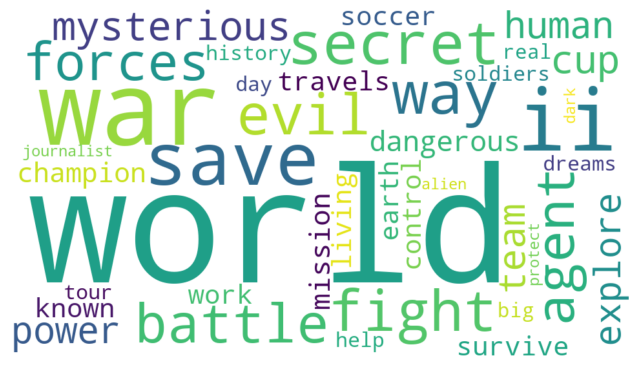

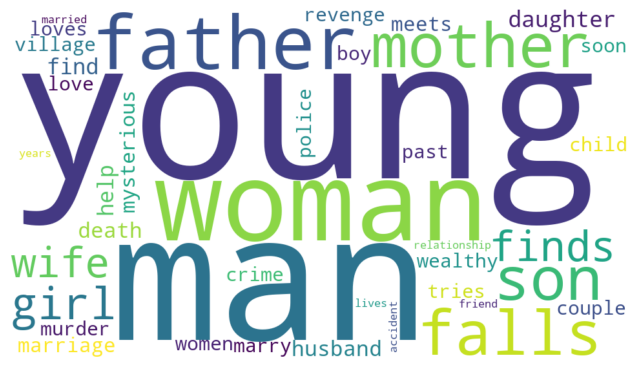

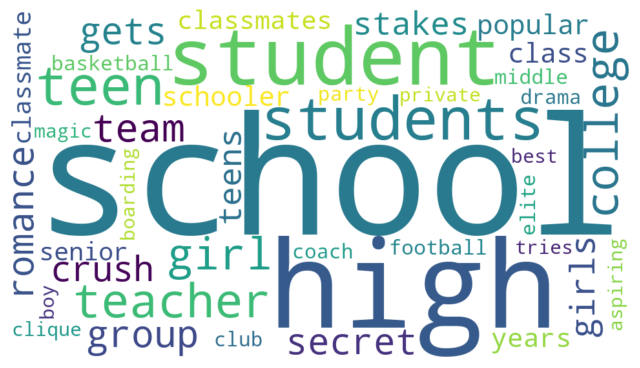

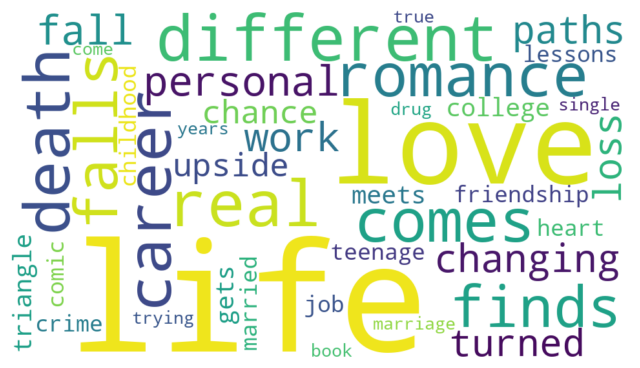

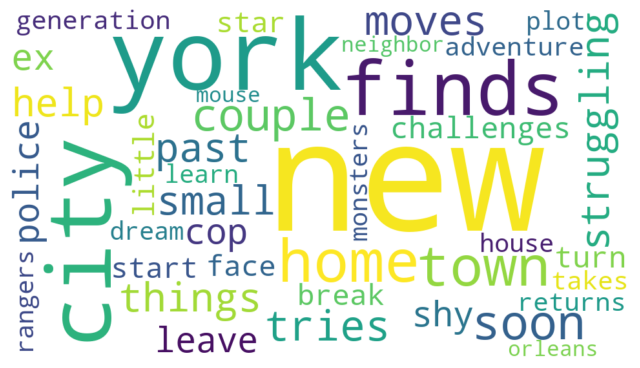

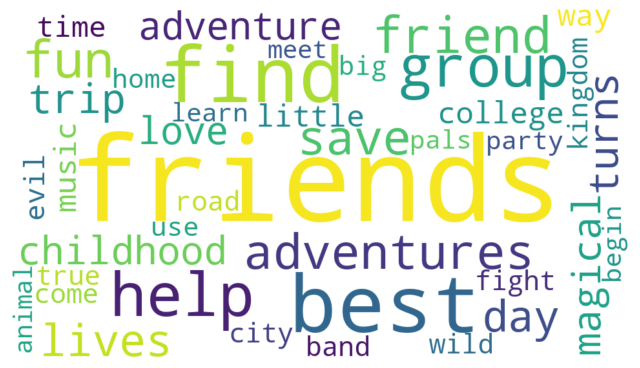

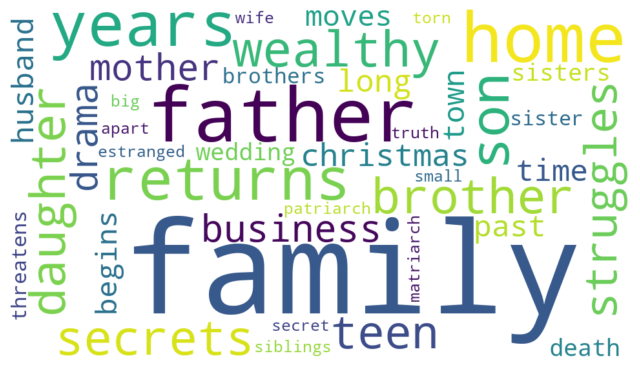

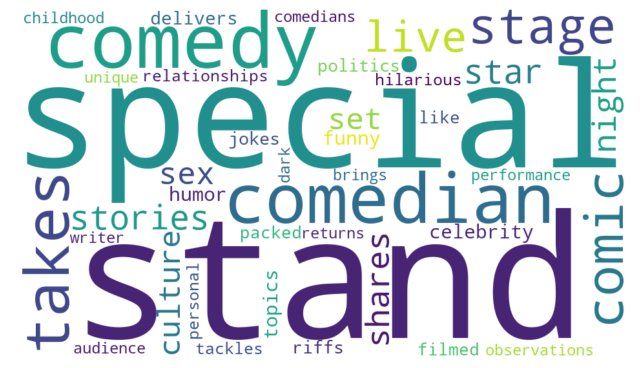

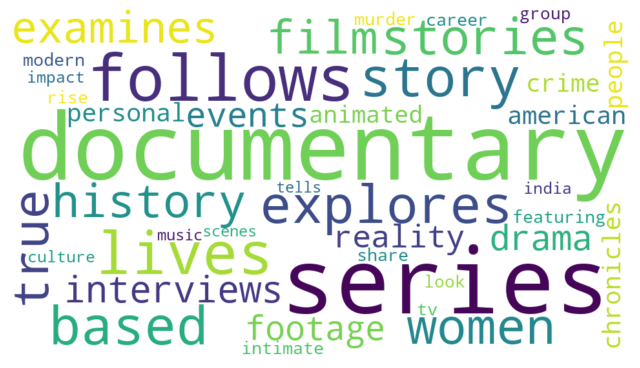

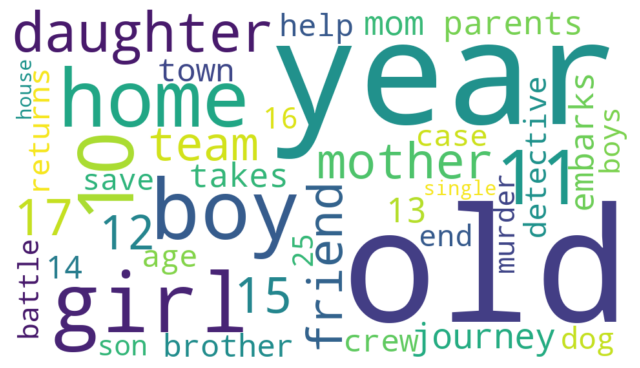

In [29]:
wordcloud_topics(nmf_para_model, tfidf_para_vectorizer.get_feature_names_out())

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from IPython.display import display, HTML  # Updated import statement

display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

def wordcloud_topics(model, features, no_top_words=40):
    for topic in range(model.num_topics):
        topic_words = model.get_topic_terms(topic, topn=no_top_words)
        size = {features[word_id]: abs(weight) for word_id, weight in topic_words}
        wc = WordCloud(background_color="white", max_words=100, width=960, height=540)
        wc.generate_from_frequencies(size)
        plt.figure(figsize=(8, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        # if you don't want to save the topic model, comment the next line
        plt.savefig(f'topic{topic}.png')
        plt.show()

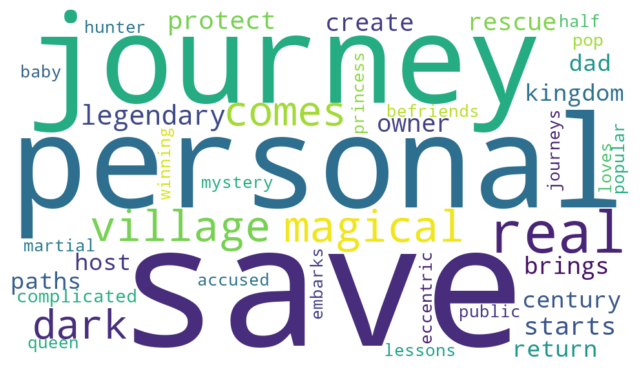

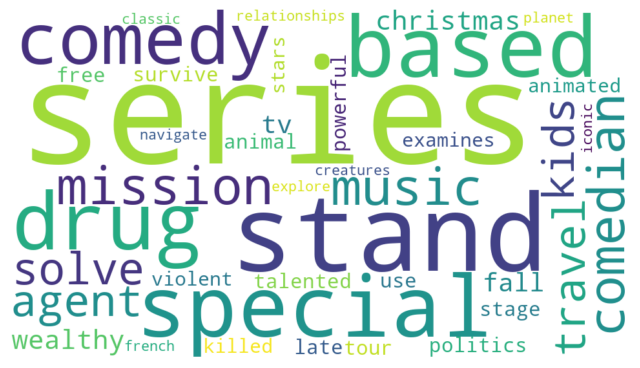

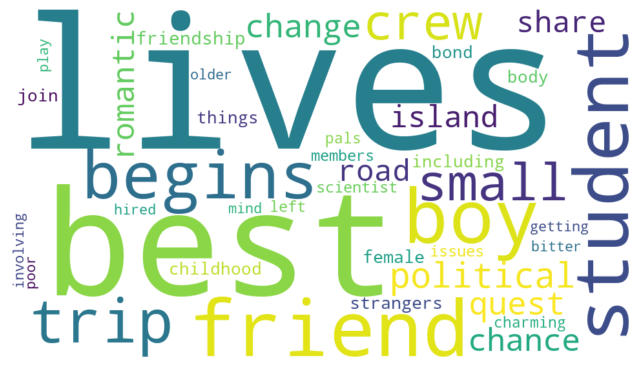

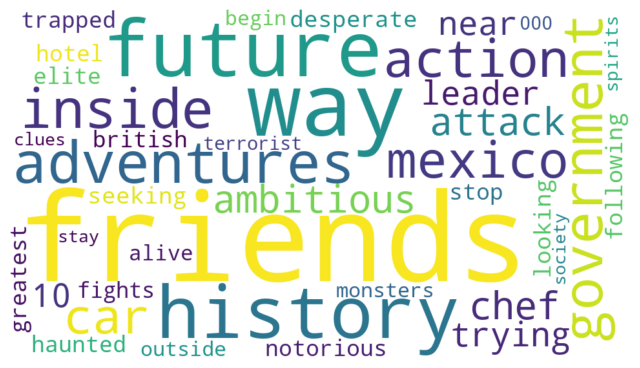

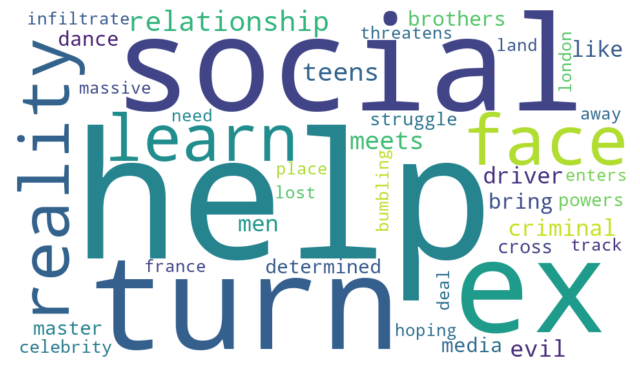

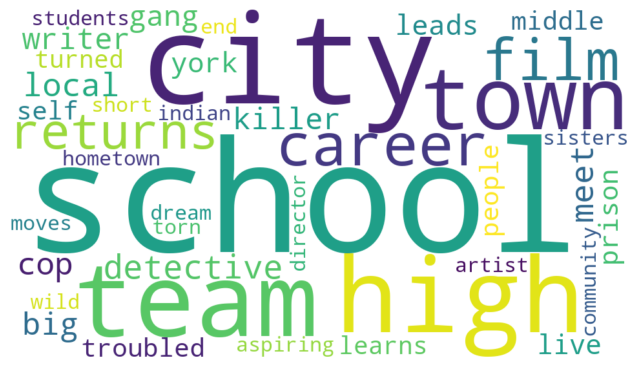

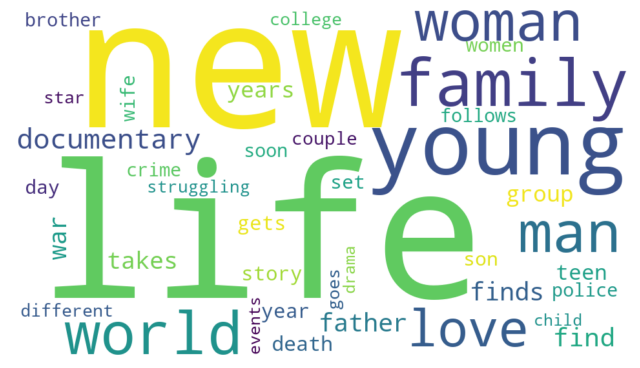

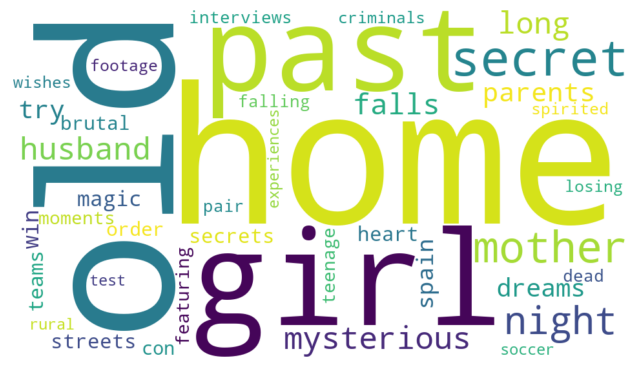

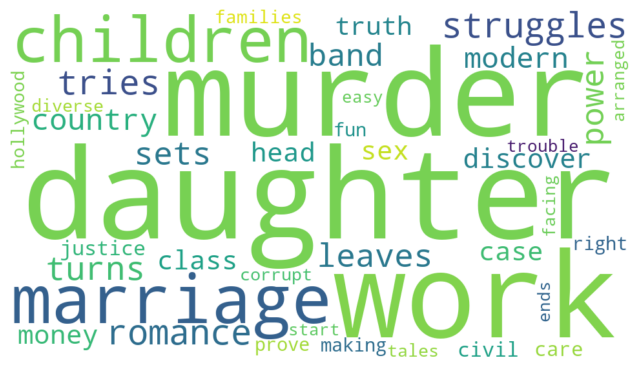

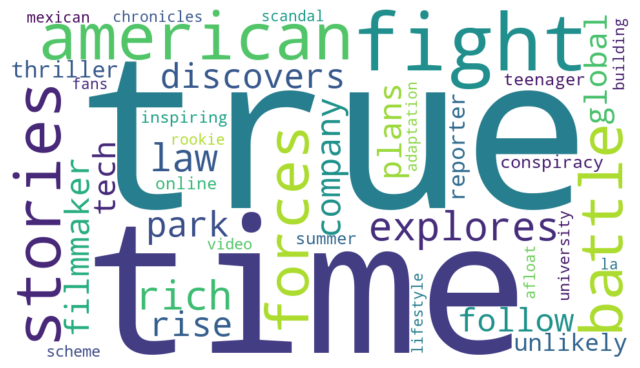

In [31]:
wordcloud_topics(lda_para_model, count_para_vectorizer.get_feature_names_out())


In [32]:
topic_names = []
voc = tfidf_para_vectorizer.get_feature_names_out()
for topic in nmf_para_model.components_:
    important = topic.argsort()
    top_word = voc[important[-1]] + " " + voc[important[-2]]
    topic_names.append("Topic " + top_word)

In [33]:
from tqdm.auto import tqdm
import numpy as np
year_data = []
for year in tqdm(np.unique(np.unique(paragraph_df["Released_Year"]))):
    W_year =nmf_para_model.transform(tfidf_para_vectors[np.array(paragraph_df["Released_Year"] == year)])
    year_data.append([year] +list(W_year.sum(axis=0)/W_year.sum()*100.0))

  0%|          | 0/15 [00:00<?, ?it/s]

<Axes: xlabel='year'>

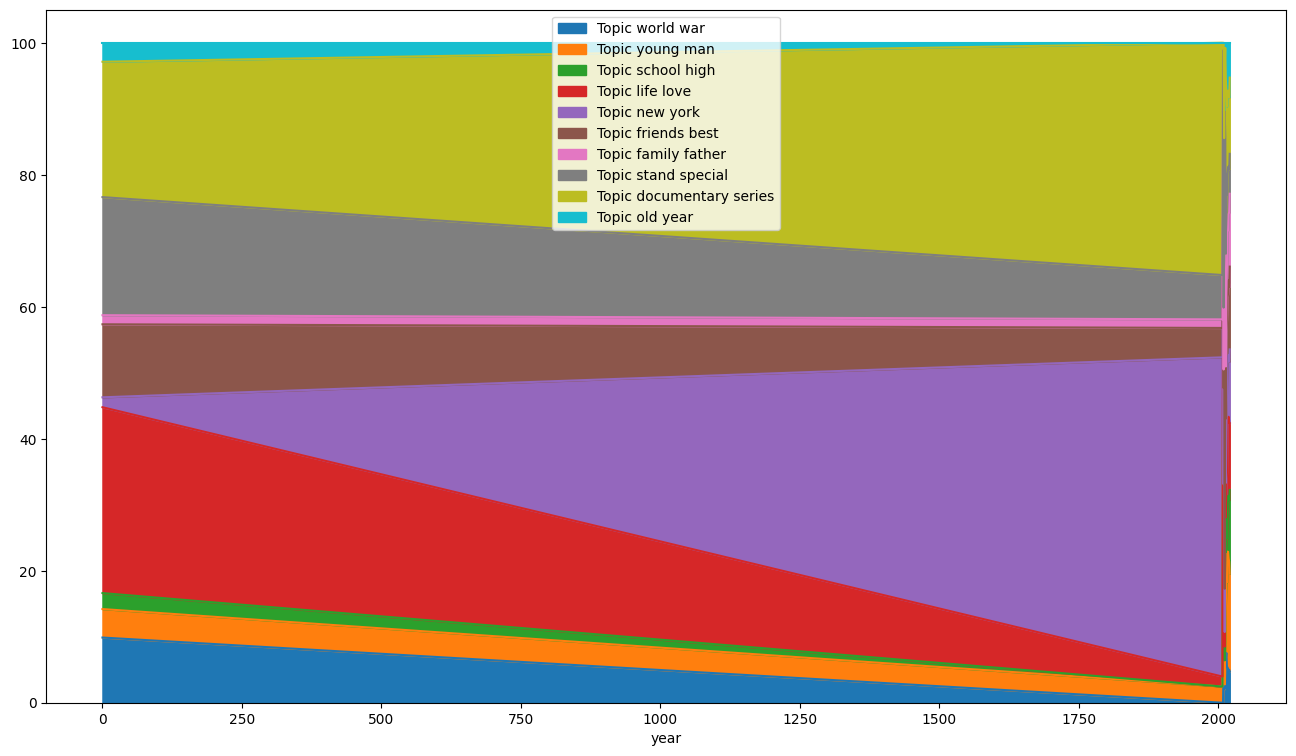

In [34]:
import matplotlib.pyplot as plt

df_year = pd.DataFrame(year_data, columns=["year"] +topic_names).set_index("year")
df_year.plot.area(figsize=(16,9))